# **Introduction**

## Research Question

> Can we predict individuals who are most likely to have or use a bank account for the purpose of icreasing access to banking services in East Africa




## Success Metrics
* Predition success of 90%
* Identification of key demographic factors that might drive individuals' financial outcomes


## Context
> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account. There is therefore need to penetrate this market further to bring more people on board!

> Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.


## Experimental Design
* Define research question
* Data Exploration
* Univariate analysis
* Bivariate Analysis
* Multivariate Analysis
* Data Modelling
* Model Tuning
* Summary of Findings
* Challenging the solution

## Relevance of Data
> This data was extracted from various Finscope surveys ranging from 2016 to 2018. It contains demographic information and the various financial services that are used by individuals across East Africa. It is therefore relevant for this analysis

# **Cleaning the Data**

In [199]:
# Importing the Libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [200]:
# Loading data
df = pd.read_csv('fin_data.csv')

In [201]:
# Shape of the data
df.shape

(23524, 13)

In [202]:
# Viewing sample data
df.sample(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
15342,Tanzania,2017,uniqueid_540,No,Urban,Yes,1.0,49.0,Female,Head of Household,Married/Living together,Primary education,Self employed
4933,Kenya,2018,uniqueid_4934,Yes,Urban,Yes,5.0,45.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
4059,Kenya,2018,uniqueid_4060,No,Rural,Yes,8.0,42.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
5875,Kenya,2018,uniqueid_5876,No,Urban,Yes,3.0,21.0,Female,Spouse,Married/Living together,Secondary education,Informally employed
13470,Rwanda,2016,uniqueid_7403,No,Rural,Yes,3.0,30.0,Male,Head of Household,Married/Living together,NaN,NaN
444,Kenya,2018,uniqueid_445,No,Rural,No,3.0,18.0,Female,Spouse,Married/Living together,Primary education,Remittance Dependent
3865,Kenya,2018,uniqueid_3866,No,Rural,No,3.0,18.0,Male,Child,Single/Never Married,Primary education,Remittance Dependent
23045,Uganda,2018,uniqueid_1623,No,Rural,Yes,7.0,27.0,Female,Spouse,Married/Living together,Primary education,Self employed
2775,Kenya,2018,uniqueid_2776,No,Rural,Yes,6.0,32.0,Male,Head of Household,Married/Living together,Tertiary education,Farming and Fishing
6753,Rwanda,2016,uniqueid_686,No,Rural,Yes,5.0,40.0,Female,Head of Household,Divorced/Seperated,Primary education,Informally employed


In [203]:
# Checking for Duplicates
df.duplicated().sum()

0

* There is no duplicate value

In [204]:
# Data summary of numerical data
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


* The **year** column has got anomalies. Years upto 2056

In [205]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


* While the year column appears to be of type **int64**, in this analysis it will be well to convert it to type object.

In [206]:
# Changing the year column to type object
df['year'] = df['year'].astype(str)

In [207]:
# Confirming the new data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  object 
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.3+ MB


In [208]:
# Checking for unique values in each column
columns = df.columns.to_list()
for col in columns:
  print(f'{col}: ')
  print(df[col].unique(), end='\n\n')

country: 
['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']

year: 
['2018' '2029' '2056' '2016' '2039' '2017']

uniqueid: 
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']

Has a Bank account: 
['Yes' 'No' nan]

Type of Location: 
['Rural' 'Urban' nan]

Cell Phone Access: 
['Yes' 'No' nan]

household_size: 
[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]

Respondent Age: 
[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]

gender_of_respondent: 
['Female' 'Male' nan]

The relathip with head: 
['Spouse' 'Head of Household' 'Ot

* There are missing values in multiple columns of the dataset
* The **year** and **Level of Education** have anomalies

For the anomalies, we shall investigate the anomalies then delete them if necessary.

In [209]:
# Investigating the anomaly in years
df[df['year'].isin([2029,2056,2039])]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job


* There are only 3 entries. This is a small proporttion of the data. We will therefore drop them.

In [210]:
# Dropping anomalies in the year column
df.drop(index=df[df['year'].isin([2029,2056,2039])].index, inplace=True)

In [211]:
# Investigating the Level of Education column
df[df['Level of Educuation'] == '6']

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
6867,Rwanda,2016,uniqueid_800,No,Rural,No,5.0,34.0,Female,Spouse,Married/Living together,6,Informally employed
7937,Rwanda,2016,uniqueid_1870,No,Rural,No,8.0,31.0,Female,Spouse,Married/Living together,6,Informally employed
8226,Rwanda,2016,uniqueid_2159,No,Rural,No,2.0,80.0,Male,Head of Household,Married/Living together,6,Informally employed
8453,Rwanda,2016,uniqueid_2386,No,Urban,Yes,3.0,36.0,Female,Head of Household,Divorced/Seperated,6,Informally employed
8778,Rwanda,2016,uniqueid_2711,No,Rural,Yes,4.0,44.0,Male,Head of Household,Married/Living together,6,Informally employed
9269,Rwanda,2016,uniqueid_3202,Yes,Urban,Yes,2.0,70.0,Female,Head of Household,Widowed,6,Remittance Dependent
9878,Rwanda,2016,uniqueid_3811,No,Rural,No,2.0,48.0,Female,Spouse,Married/Living together,6,Formally employed Private
9944,Rwanda,2016,uniqueid_3877,Yes,Urban,Yes,3.0,38.0,Male,Head of Household,Married/Living together,6,Informally employed
10560,Rwanda,2016,uniqueid_4493,No,Rural,Yes,6.0,48.0,Female,Spouse,Married/Living together,6,Informally employed
10767,Rwanda,2016,uniqueid_4700,No,Rural,No,2.0,63.0,Female,Head of Household,Divorced/Seperated,6,Informally employed


* The entries are 20
* Most of the affected entries are from RWANDA
* These too shall be dropped

In [212]:
# Dropping entries in the 'Level of Education' column
df.drop(index=df[df['Level of Educuation'] == '6'].index, inplace=True)

In [213]:
# Shape of the new dataset
df.shape

(23497, 13)

In [214]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

Has a Bank account        36
gender_of_respondent      34
Respondent Age            34
marital_status            32
Type of Job               30
Level of Educuation       29
household_size            28
Type of Location          15
country                   14
Cell Phone Access         11
The relathip with head     4
uniqueid                   0
year                       0
dtype: int64

* Dropping the missing values

In [215]:
# Dropping all the missing values
df.dropna(inplace=True)

In [216]:
# New shape
df.shape

(23316, 13)

In [217]:
# Dropping unnecessary colum 'uniqueid'
df.drop(columns='uniqueid', inplace=True)

In [218]:
# Viewing the remaining columns
df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

# **Univariate Analysis**

## Categorical Data

In [219]:
# Frequency Distributions for CATEGORICAL variables
# Creating summaries
cols = df.select_dtypes(include='object').columns.to_list()
for col in cols:
  print(f'Column: {col}')
  print(df[col].value_counts().sort_values(ascending=False)/len(df[col]))
  print('\n')

Column: country
Rwanda      0.371676
Tanzania    0.278650
Kenya       0.260079
Uganda      0.089595
Name: country, dtype: float64


Column: year
2016    0.371633
2018    0.349588
2017    0.278650
2039    0.000043
2029    0.000043
2056    0.000043
Name: year, dtype: float64


Column: Has a Bank account
No     0.858809
Yes    0.141191
Name: Has a Bank account, dtype: float64


Column: Type of Location
Rural    0.611083
Urban    0.388917
Name: Type of Location, dtype: float64


Column: Cell Phone Access
Yes    0.742752
No     0.257248
Name: Cell Phone Access, dtype: float64


Column: gender_of_respondent
Female    0.589681
Male      0.410319
Name: gender_of_respondent, dtype: float64


Column: The relathip with head
Head of Household      0.545334
Spouse                 0.277063
Child                  0.095256
Parent                 0.045848
Other relative         0.028393
Other non-relatives    0.008106
Name: The relathip with head, dtype: float64


Column: marital_status
Married/Living 

### Findings

* Most of the participants in the survey were from Rwanda (37%)
* About 37% of the data was taken from the survey done in 2016
* 86% respondents **do not** have accounts.
* 61% of the participants live in the Rural
* Only 27.5% have access to Cell phones
* More females participated in the survey than males (58.96%)
* 54.5% of the respondents were heads of household
* 45.8% of the respondents are married
* 54.4% of the respondents have received Primary education only
* 27.2% of the respondents are self employed and 23.7% informally employed

### Visualizations

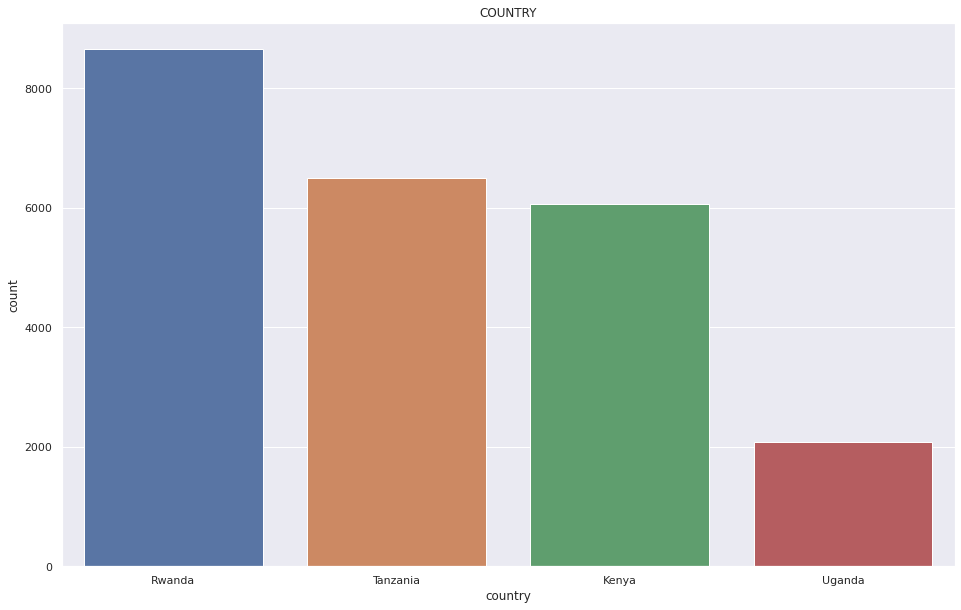

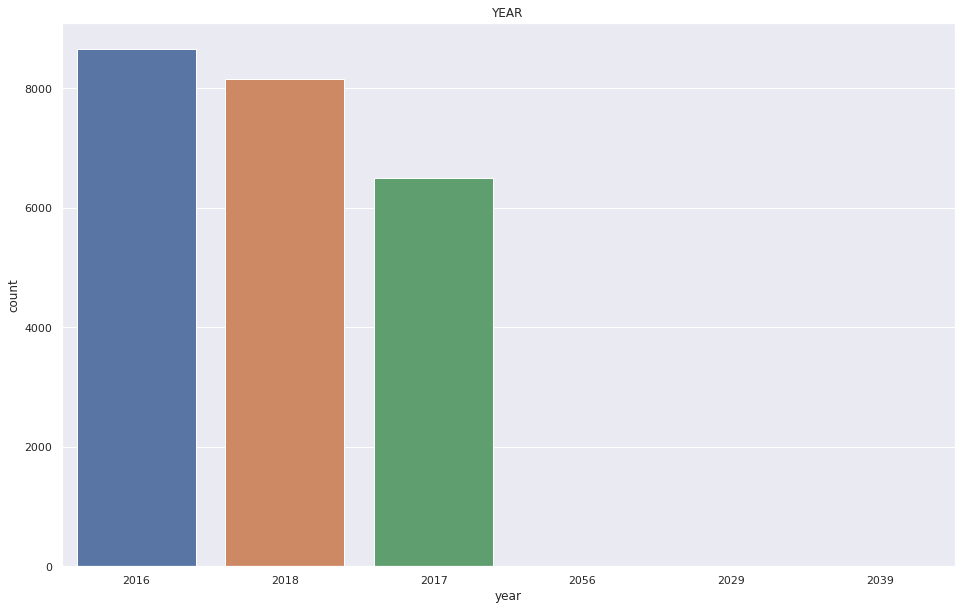

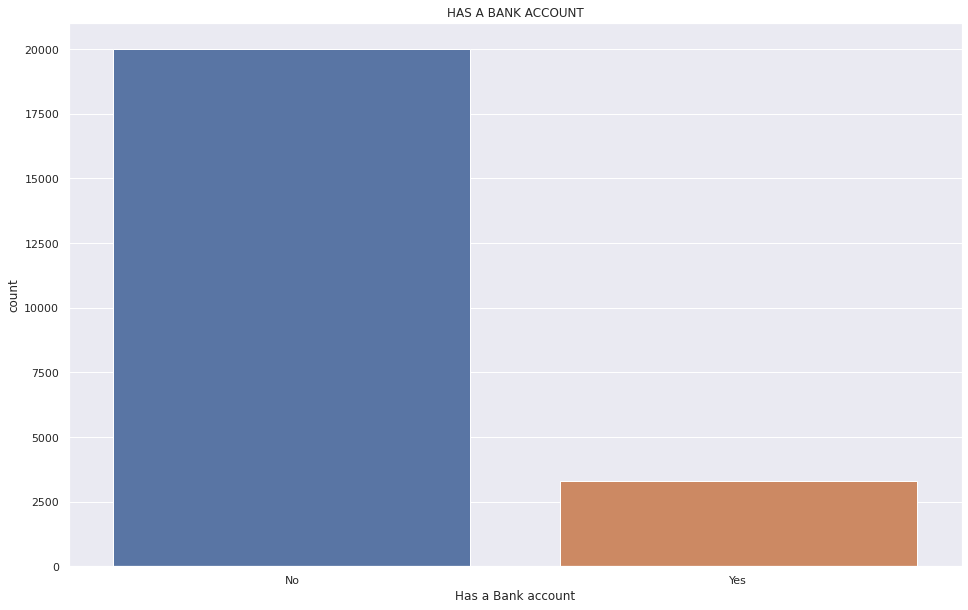

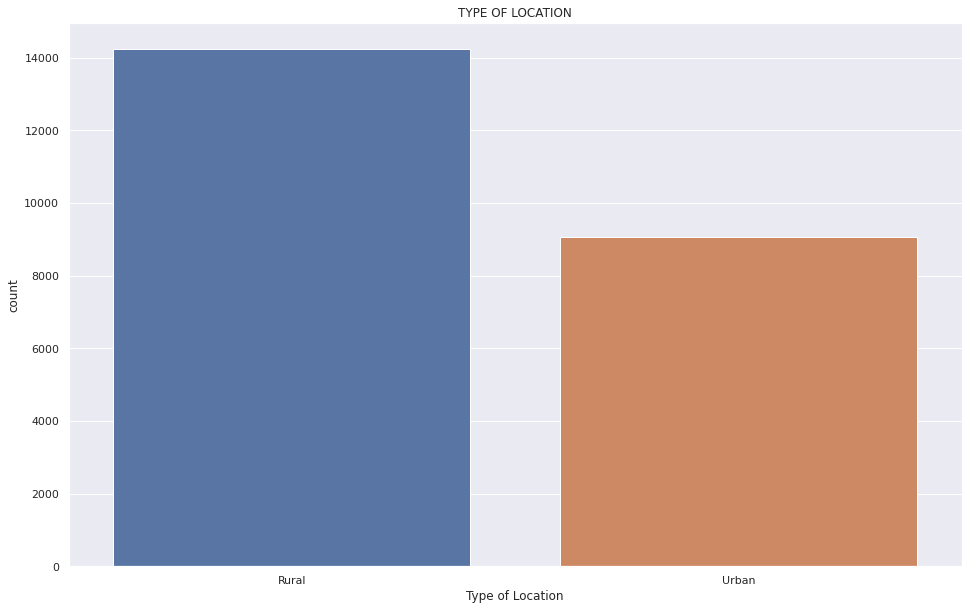

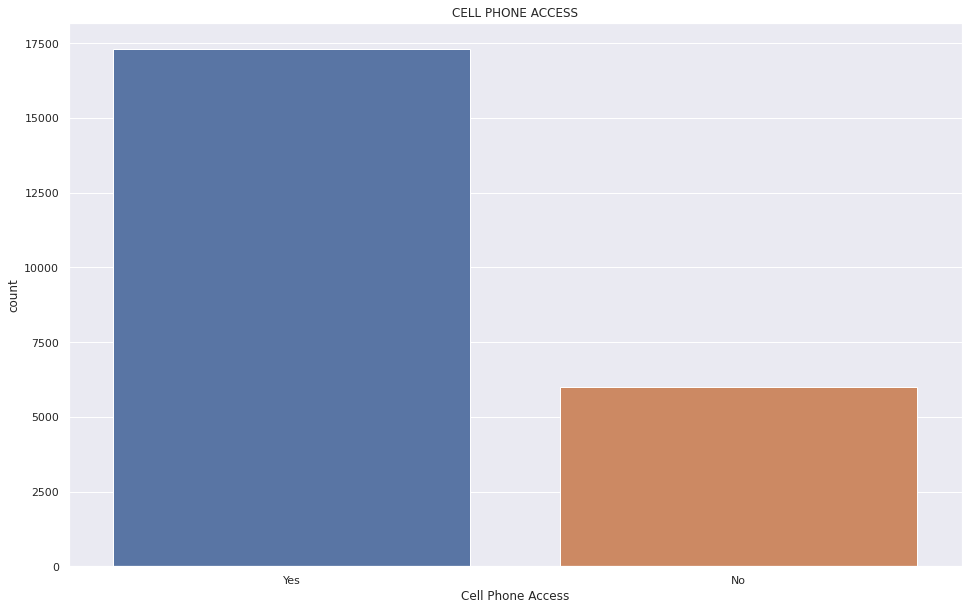

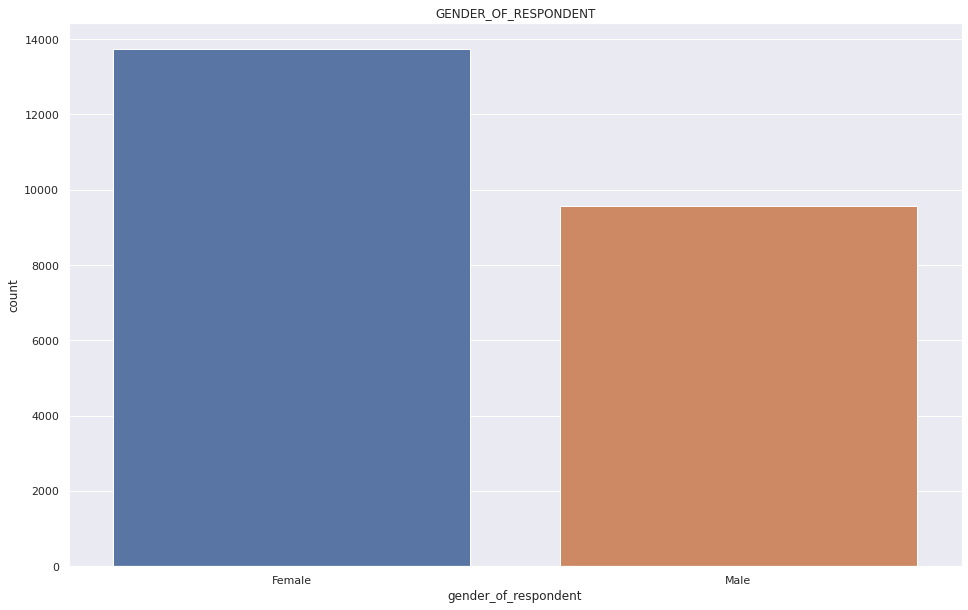

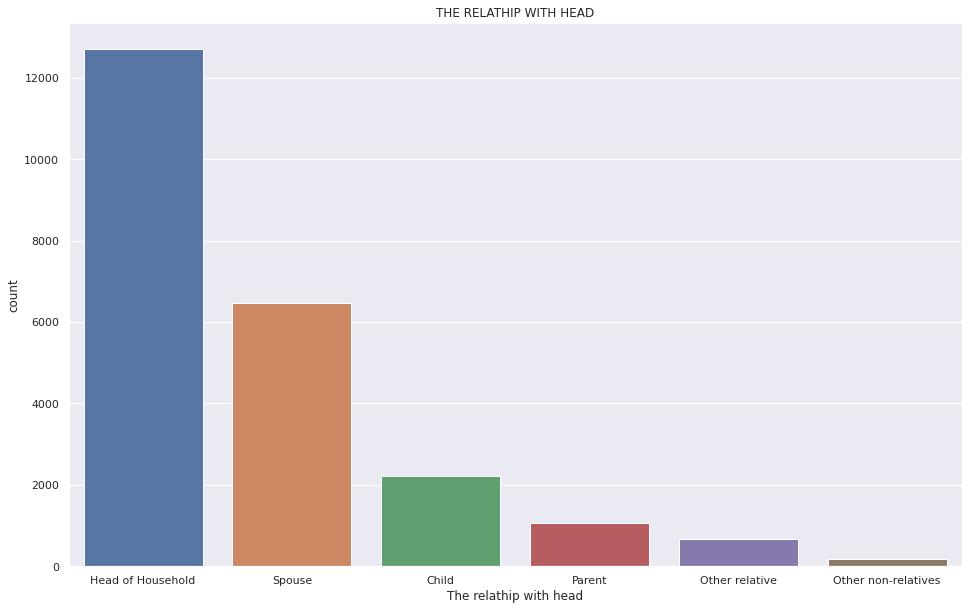

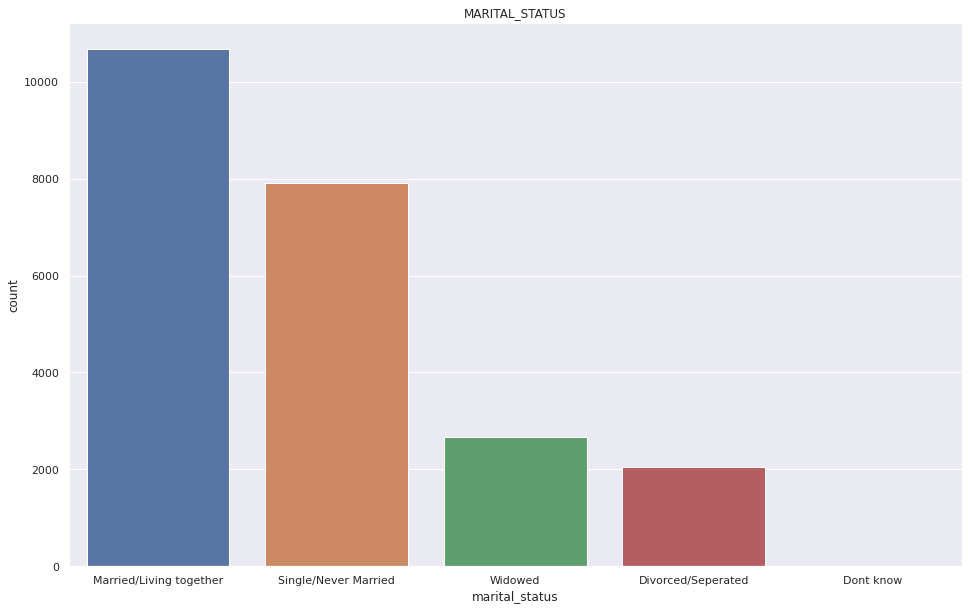

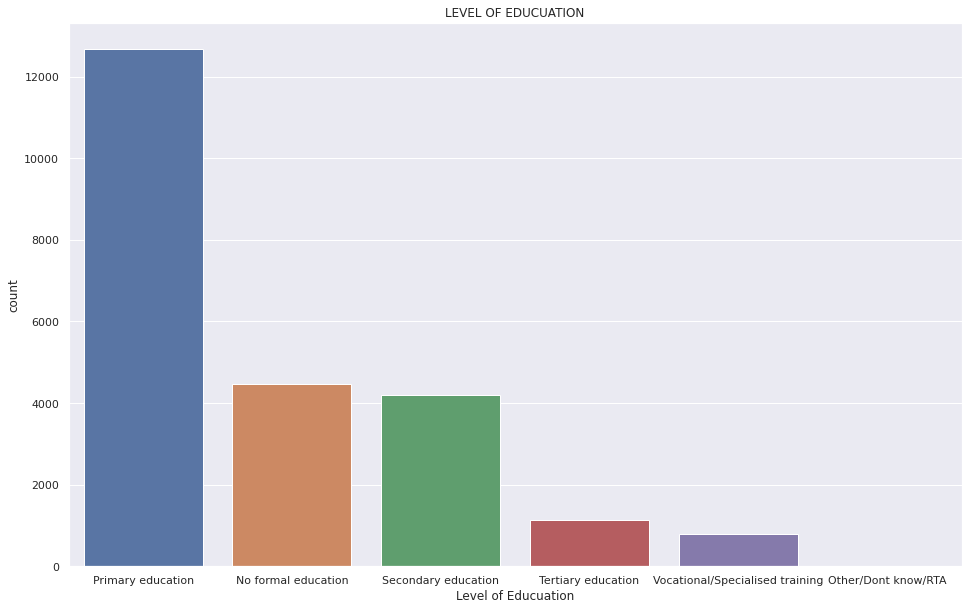

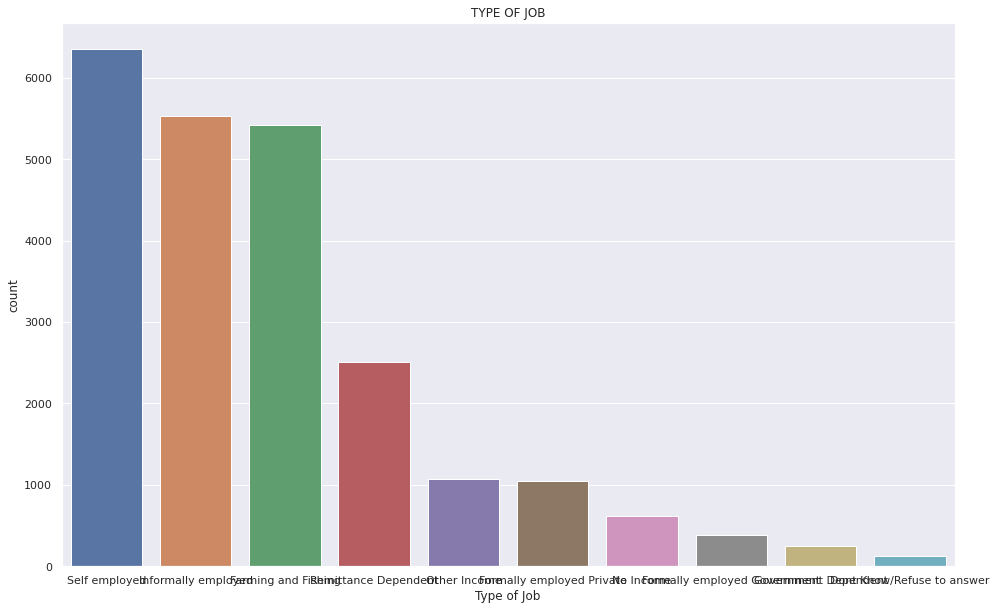

In [220]:
# Count Plots for the categorical data
for col in cols:
  %matplotlib inline
  sns.set(style="darkgrid")
  plt.figure(figsize=(16, 10))
  ax = sns.countplot(x=col,  data=df, order = df[col].value_counts().index)
  plt.title(col.upper())
  plt.show()


## Numerical Data

> Having dealt with columns of type category, we are left with two columns that are numeric i.e **household_size** and **Respondent Age**. Here we will explore the distribution of these categories.

> Here we are going to compute measures of central tendency and the measures of dispersion.

### household_size

In [221]:
# Summary statistics
# This will provide the centrl tenency and the measure of dispersion
df.household_size.describe()

count    23316.000000
mean         3.688497
std          2.280751
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

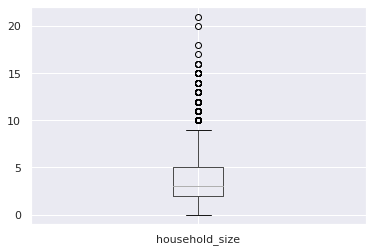

In [222]:
# Boxplot
df.boxplot(column='household_size')

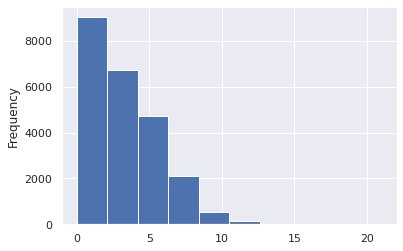

In [223]:
# Distribution
df['household_size'].plot.hist()

In [224]:
# Range
df.household_size.max() - df.household_size.min()

21.0

In [225]:
# Coefficient of skewness
df.household_size.skew()

0.9737241620647232

> As shown by the histogram and the computation above the data is positively skewed. The data thefore has extremely huge outliers.

### Age

In [226]:
# Summary statistics
# This will provide the central tendency and the measure of dispersion
df['Respondent Age'].describe()

count    23316.000000
mean        38.791988
std         16.510509
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent Age, dtype: float64

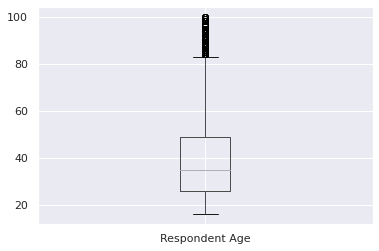

In [227]:
# Boxplot of the age 
df.boxplot(column='Respondent Age')

In [228]:
# Coefficient of skewness
df['Respondent Age'].skew()

0.8413234887046219

In [229]:
# Range
df['Respondent Age'].max() - df['Respondent Age'].min()

84.0

In [230]:
# Most frequent age
df['Respondent Age'].mode()

0    30.0
dtype: float64

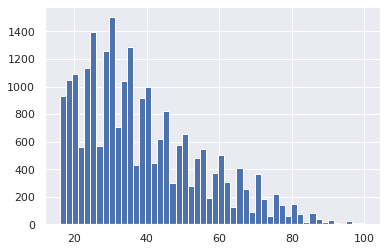

In [231]:
# Distribution
df['Respondent Age'].hist(bins=50)

> The age data is also positively skewed. It therefore has huge values to it right.

# **Bivariate Analysis**

## Numerical Data

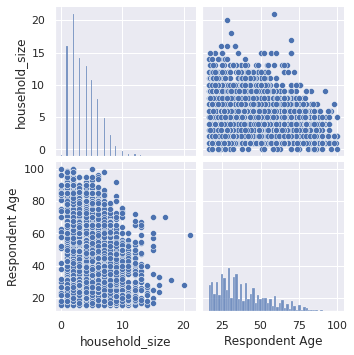

In [232]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

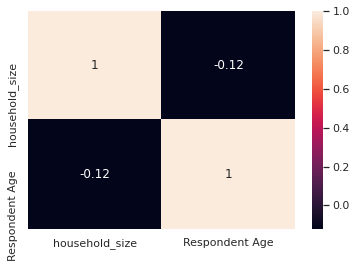

In [233]:
sns.heatmap(df.corr(),annot=True)
plt.show()

> There is a very weak negative relationship between the repondents age and the household size

## Categorical Data

> We are going to explore any other categorical data in relation to "has a bank account" column

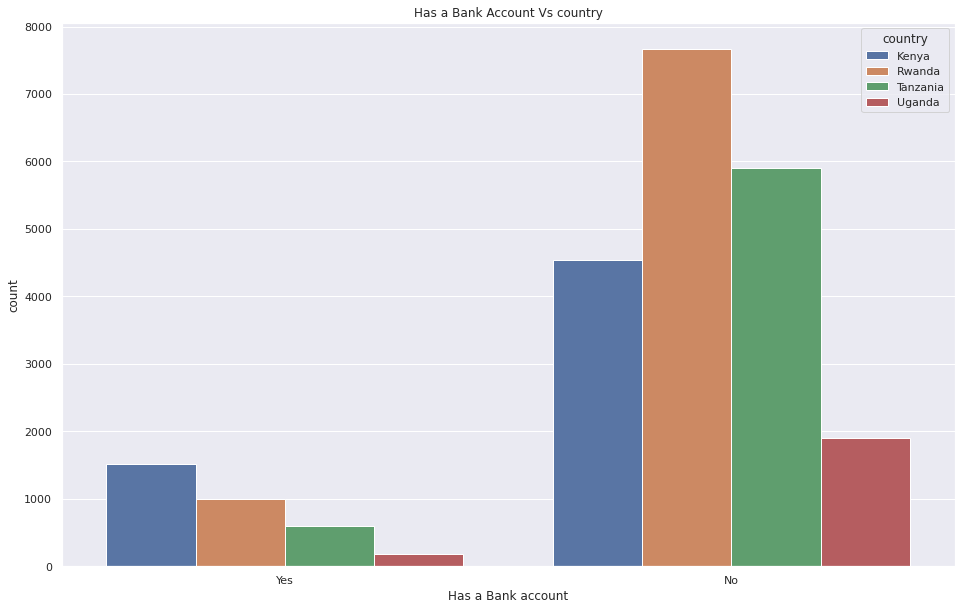

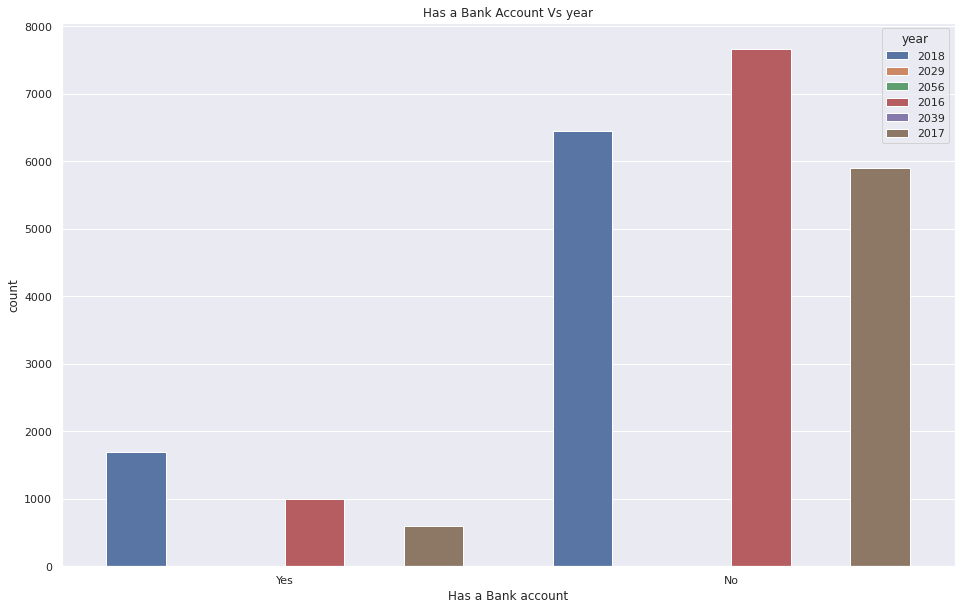

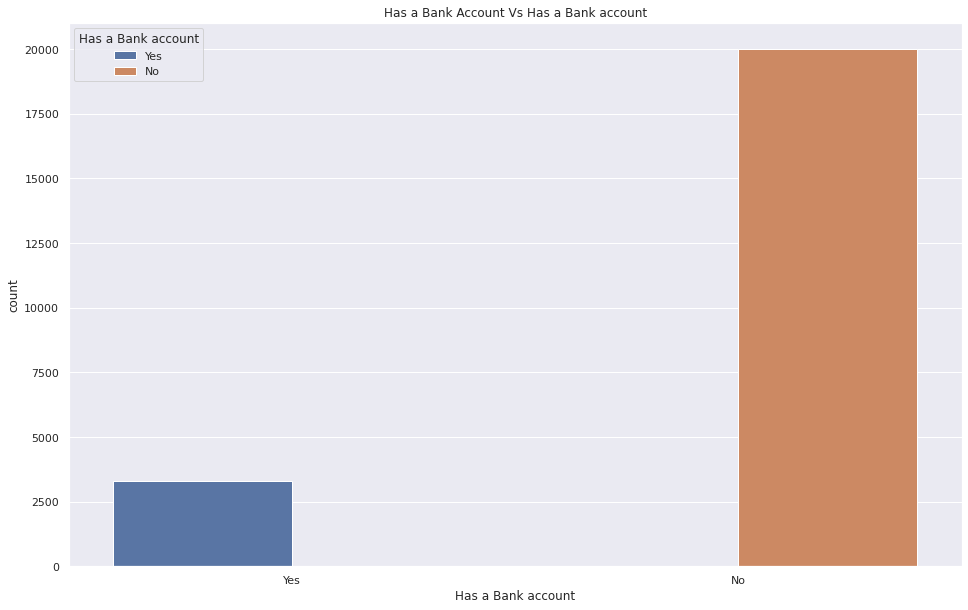

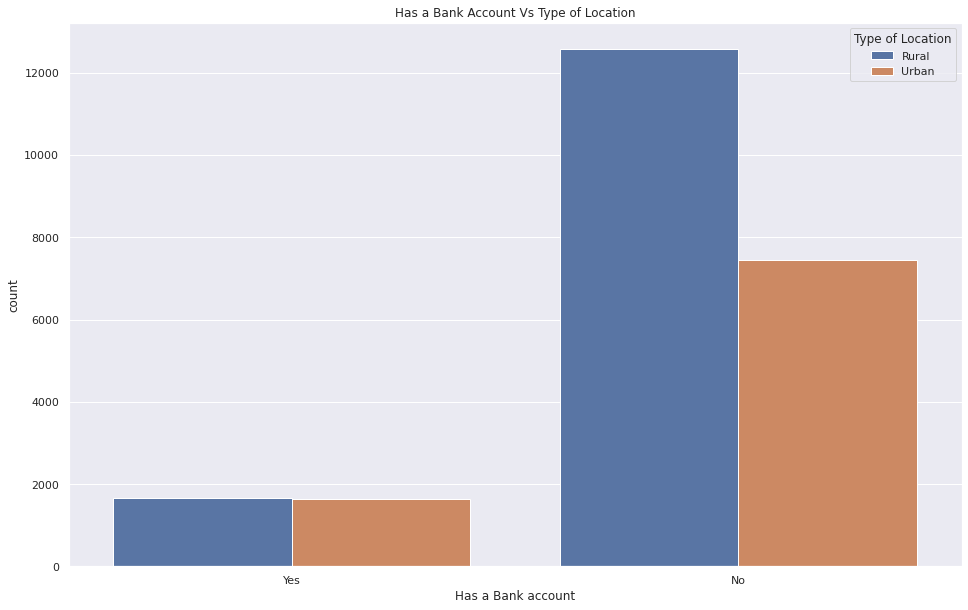

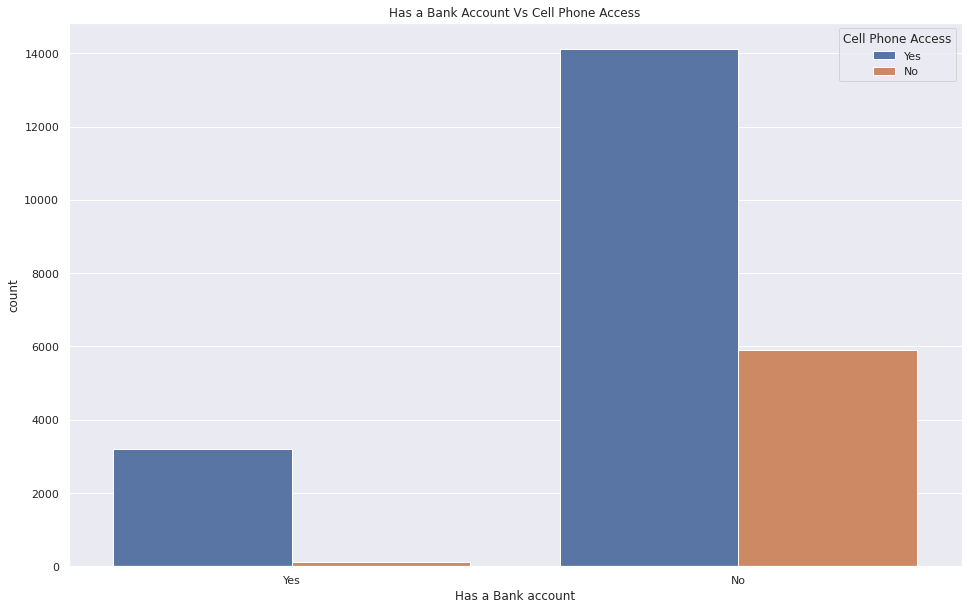

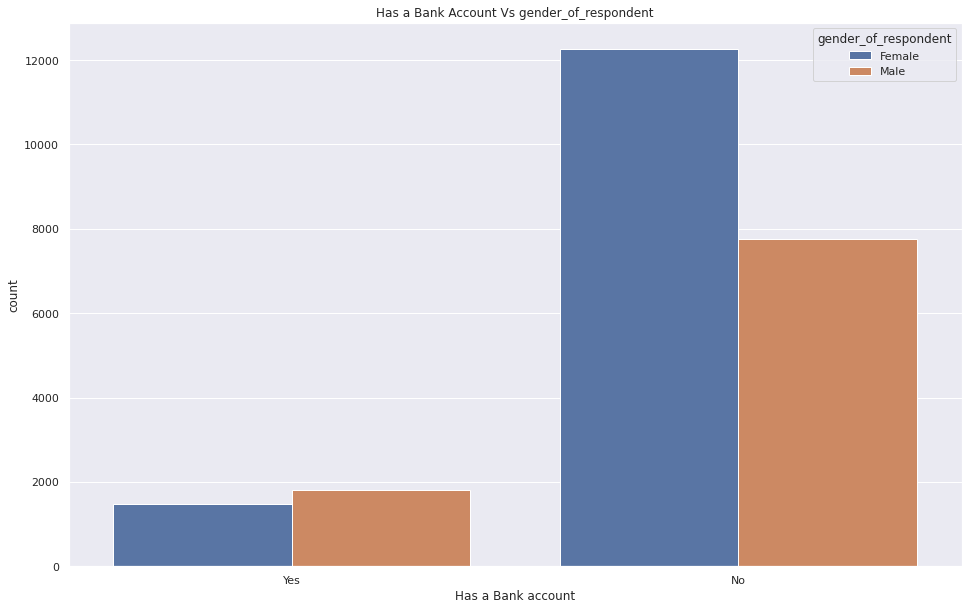

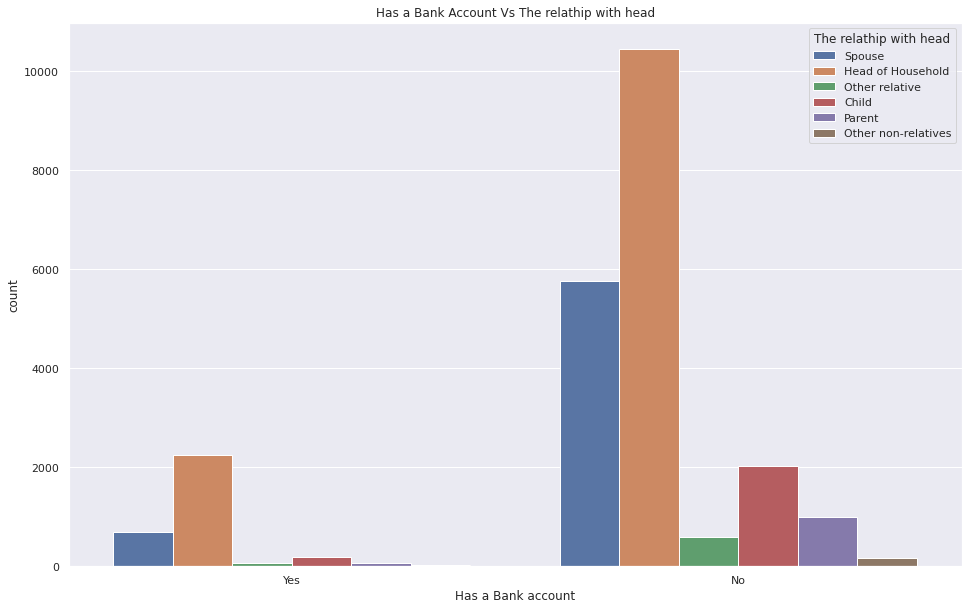

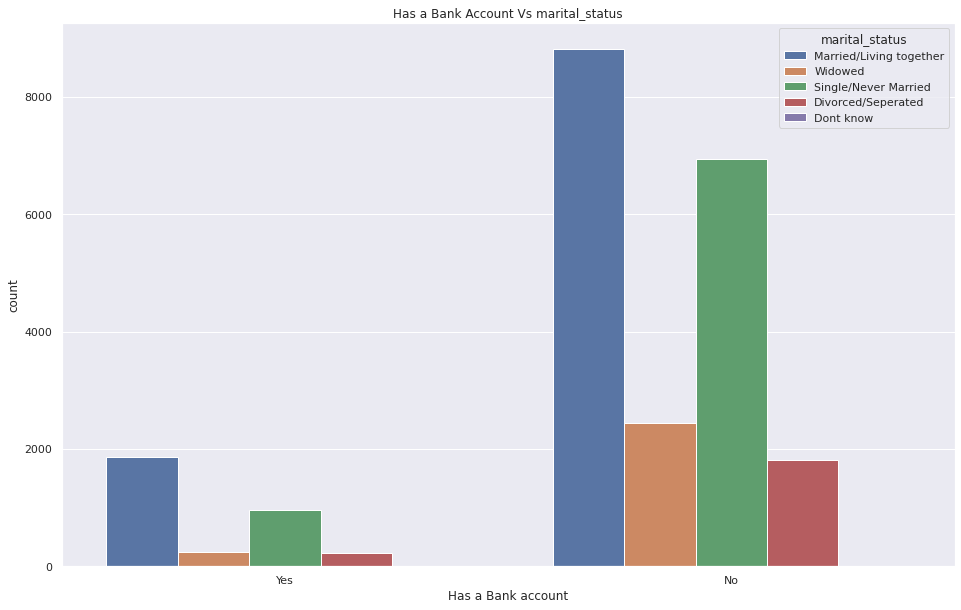

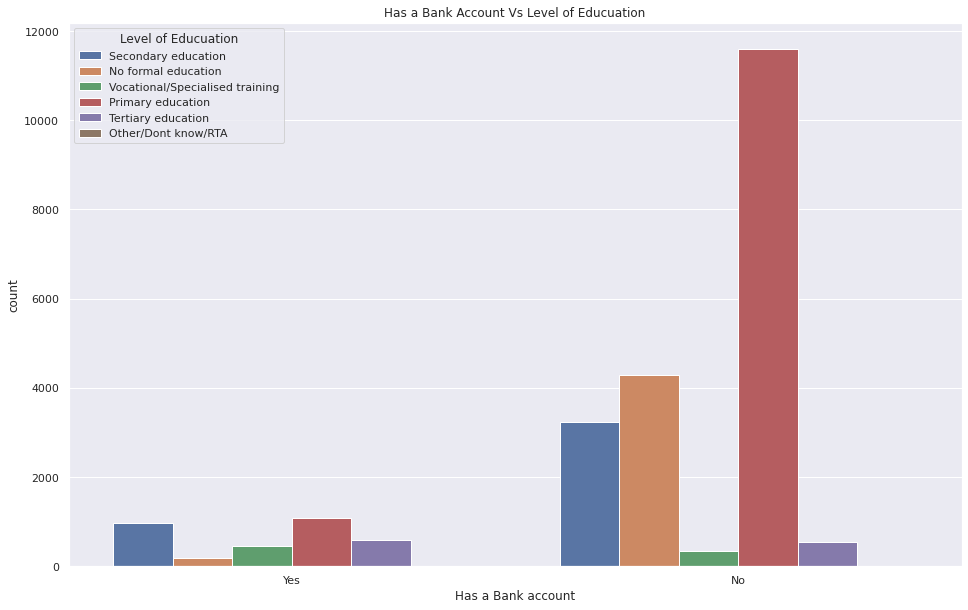

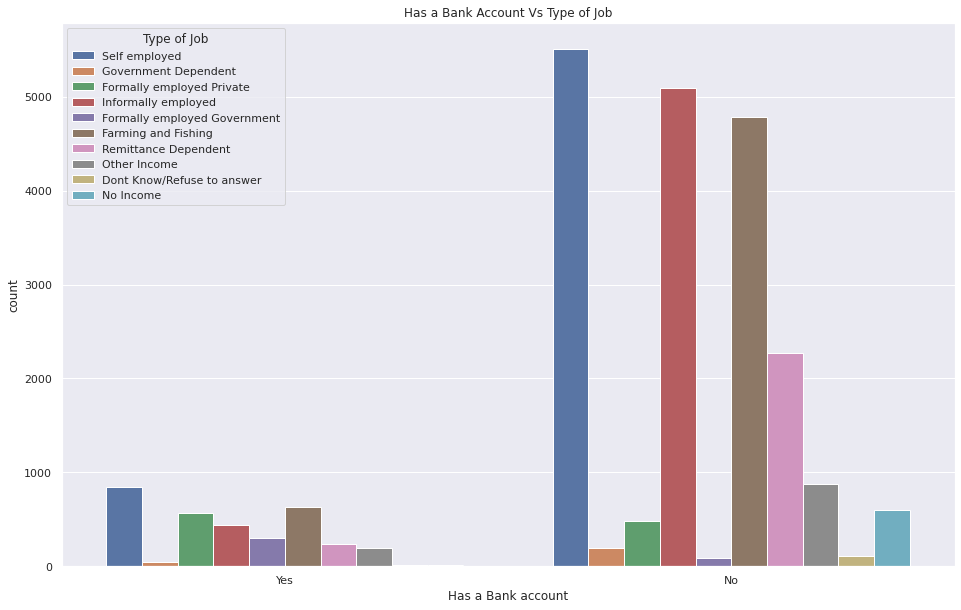

In [234]:
# 'Has a Bank Account' in relation to other categorical data
for col in cols:
  %matplotlib inline
  sns.set(style="darkgrid")
  plt.figure(figsize=(16, 10))
  ax = sns.countplot(x='Has a Bank account', hue=col, data=df)
  plt.title("Has a Bank Account Vs "+ col)
  plt.show()

# Multivariate Analysis

Here we will endeavor to identify the factors that really affects the bankability of an individual

In [235]:
# Previewing df
df

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [236]:
# Extracting the dependent variable
y = df['Has a Bank account'].values
y

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [238]:
# Extracting the independent variables
X = df.drop(['Has a Bank account'], axis=1)
X

,country,year,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [240]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
cols = X.columns.to_list()

for col in cols:
  X[col] = labelencoder.fit_transform(X[col])

In [241]:
# Inspecting data types
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23316 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country                 23316 non-null  int64
 1   year                    23316 non-null  int64
 2   Type of Location        23316 non-null  int64
 3   Cell Phone Access       23316 non-null  int64
 4   household_size          23316 non-null  int64
 5   Respondent Age          23316 non-null  int64
 6   gender_of_respondent    23316 non-null  int64
 7   The relathip with head  23316 non-null  int64
 8   marital_status          23316 non-null  int64
 9   Level of Educuation     23316 non-null  int64
 10  Type of Job             23316 non-null  int64
dtypes: int64(11)
memory usage: 2.8 MB


In [242]:
# Dividing the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [246]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [247]:
# Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


In [248]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [249]:
# Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[3919   92]
 [ 496  157]]
Accuracy0.8739279588336192


### Findings

* Our accuracy of prediction is **87.39%**